# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [47]:
!pip install tensorflow==1.15.0

    100% |████████████████████████████████| 124.0MB 300kB/s ta 0:00:011   39% |████████████▋                   | 48.8MB 50.7MB/s eta 0:00:02
    100% |████████████████████████████████| 3.8MB 7.7MB/s eta 0:00:01
    100% |████████████████████████████████| 15.2MB 1.6MB/s ta 0:00:011
    100% |████████████████████████████████| 512kB 15.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 10.4MB/s ta 0:00:01    96% |███████████████████████████████ | 61kB 20.6MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 5.2MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 4.8MB/s ta 0:00:011
wildqat 1.1.9 has requirement numpy==1.15.1, but you'll have numpy 1.18.2 which is incompatible.
scikit-image 0.14.2 has requirement pillow>=4.3.0, but you'll have pillow 4.2.1 which is incompatible.
plotly-express 0.4.1 has requirement plotly>=4.1.0, but you'll have plotly 4.0.0 which is incompatible.
dwave-ocean-sdk 1.3.0 has requirement numpy<1.16.0, but you'll have n

In [62]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [7]:
path = './training' 
flist = os.listdir(path)

In [8]:
!ls -a ./training

.           cat.107.jpg cat.41.jpg  cat.96.jpg  dog.256.jpg dog.327.jpg
..          cat.27.jpg  cat.63.jpg  dog.114.jpg dog.32.jpg  dog.46.jpg


In [9]:
flist

['cat.27.jpg',
 'dog.32.jpg',
 'cat.107.jpg',
 'cat.96.jpg',
 'cat.41.jpg',
 'dog.46.jpg',
 'dog.114.jpg',
 'dog.327.jpg',
 'dog.256.jpg',
 'cat.63.jpg']

In [10]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.27.jpg',
 'dog.32.jpg',
 'cat.107.jpg',
 'cat.96.jpg',
 'cat.41.jpg',
 'dog.46.jpg',
 'dog.114.jpg',
 'dog.327.jpg',
 'dog.256.jpg',
 'cat.63.jpg']

## globを使用する場合

In [11]:
img_list = glob.glob(path + '/*' + ".jpg")

In [12]:
img_list 

['./training/cat.27.jpg',
 './training/dog.32.jpg',
 './training/cat.107.jpg',
 './training/cat.96.jpg',
 './training/cat.41.jpg',
 './training/dog.46.jpg',
 './training/dog.114.jpg',
 './training/dog.327.jpg',
 './training/dog.256.jpg',
 './training/cat.63.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [23]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [24]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


# イメージの出力

In [43]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.26666667, 0.27058824, 0.25098039],
        [0.26666667, 0.27058824, 0.25098039],
        [0.26666667, 0.27058824, 0.25098039],
        ...,
        [0.65882353, 0.65490196, 0.64705882],
        [0.65098039, 0.64705882, 0.63921569],
        [0.64313725, 0.63921569, 0.63137255]],

       [[0.2745098 , 0.27843137, 0.25882353],
        [0.2745098 , 0.27843137, 0.25882353],
        [0.2745098 , 0.27843137, 0.25882353],
        ...,
        [0.67058824, 0.6627451 , 0.66666667],
        [0.66666667, 0.65882353, 0.6627451 ],
        [0.65882353, 0.65098039, 0.65490196]],

       [[0.28235294, 0.28627451, 0.26666667],
        [0.28235294, 0.28627451, 0.26666667],
        [0.28235294, 0.28627451, 0.26666667],
        ...,
        [0.68235294, 0.68627451, 0.69411765],
        [0.67843137, 0.68235294, 0.69019608],
        [0.66666667, 0.67058824, 0.67843137]],

       ...,

       [[0.14509804, 0.10588235, 0.06666667],
        [0.14901961, 0.10980392, 0.07058824],
        [0.15294118, 0

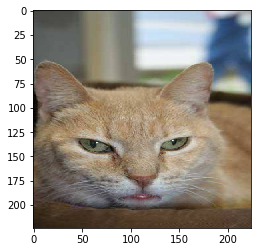

In [65]:
# 配列を画像として出力

plt.imshow(cat_img_array[3])

plt.show()

In [16]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


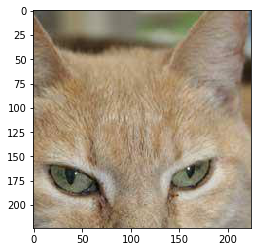

In [67]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

plt.show()

<class 'PIL.Image.Image'>


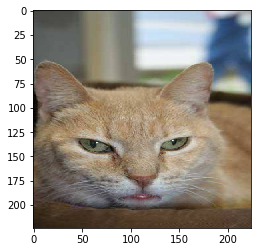

In [68]:
img = Image.open(img_list[4])

img_resize = img.resize((224,224))

print(type(img_resize))

plt.imshow(img_resize)

plt.show()

## Kerasでもやってみよう

In [48]:
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [53]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.26666668, 0.27058825, 0.2509804 ],
        [0.26666668, 0.27058825, 0.2509804 ],
        [0.26666668, 0.27058825, 0.2509804 ],
        ...,
        [0.65882355, 0.654902  , 0.64705884],
        [0.6509804 , 0.64705884, 0.6392157 ],
        [0.6431373 , 0.6392157 , 0.6313726 ]],

       [[0.27450982, 0.2784314 , 0.25882354],
        [0.27450982, 0.2784314 , 0.25882354],
        [0.27450982, 0.2784314 , 0.25882354],
        ...,
        [0.67058825, 0.6627451 , 0.6666667 ],
        [0.6666667 , 0.65882355, 0.6627451 ],
        [0.65882355, 0.6509804 , 0.654902  ]],

       [[0.28235295, 0.28627452, 0.26666668],
        [0.28235295, 0.28627452, 0.26666668],
        [0.28235295, 0.28627452, 0.26666668],
        ...,
        [0.68235296, 0.6862745 , 0.69411767],
        [0.6784314 , 0.68235296, 0.6901961 ],
        [0.6666667 , 0.67058825, 0.6784314 ]],

       ...,

       [[0.14509805, 0.10588235, 0.06666667],
        [0.14901961, 0.10980392, 0.07058824],
        [0.15294118, 0

<class 'PIL.Image.Image'>


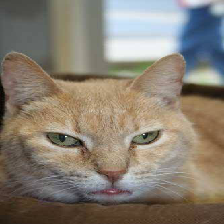

In [70]:
print(type(img_keras))

img_keras

# openCVの色形式

In [19]:
import cv2

## グレースケール 

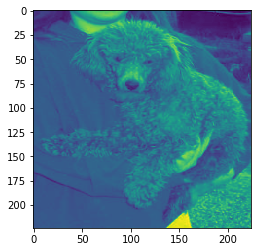

In [71]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

plt.show()

## BGRとRGB

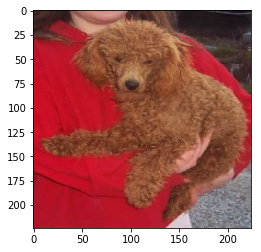

In [72]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

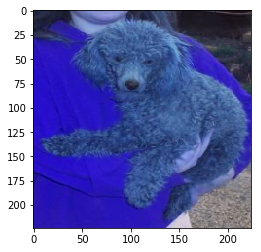

In [73]:
# BGRチャネル

plt.imshow(img)

plt.show()